In [16]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [4]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression
# from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Lars
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from IPython.display import Image

import category_encoders as ce
from sklearn.preprocessing import FunctionTransformer

from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection  import RFE
from sklearn.decomposition import PCA

In [5]:
path_train = 'train_house_B.csv'
path_test = 'test_house_B.csv'

df_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

In [6]:
df_train

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,2604000,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,4900000,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,4480000,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,3234000,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,3780000,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,3360000,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,5950000,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,3675000,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,7455000,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [7]:
df_train.duplicated().sum()

0

<AxesSubplot:>

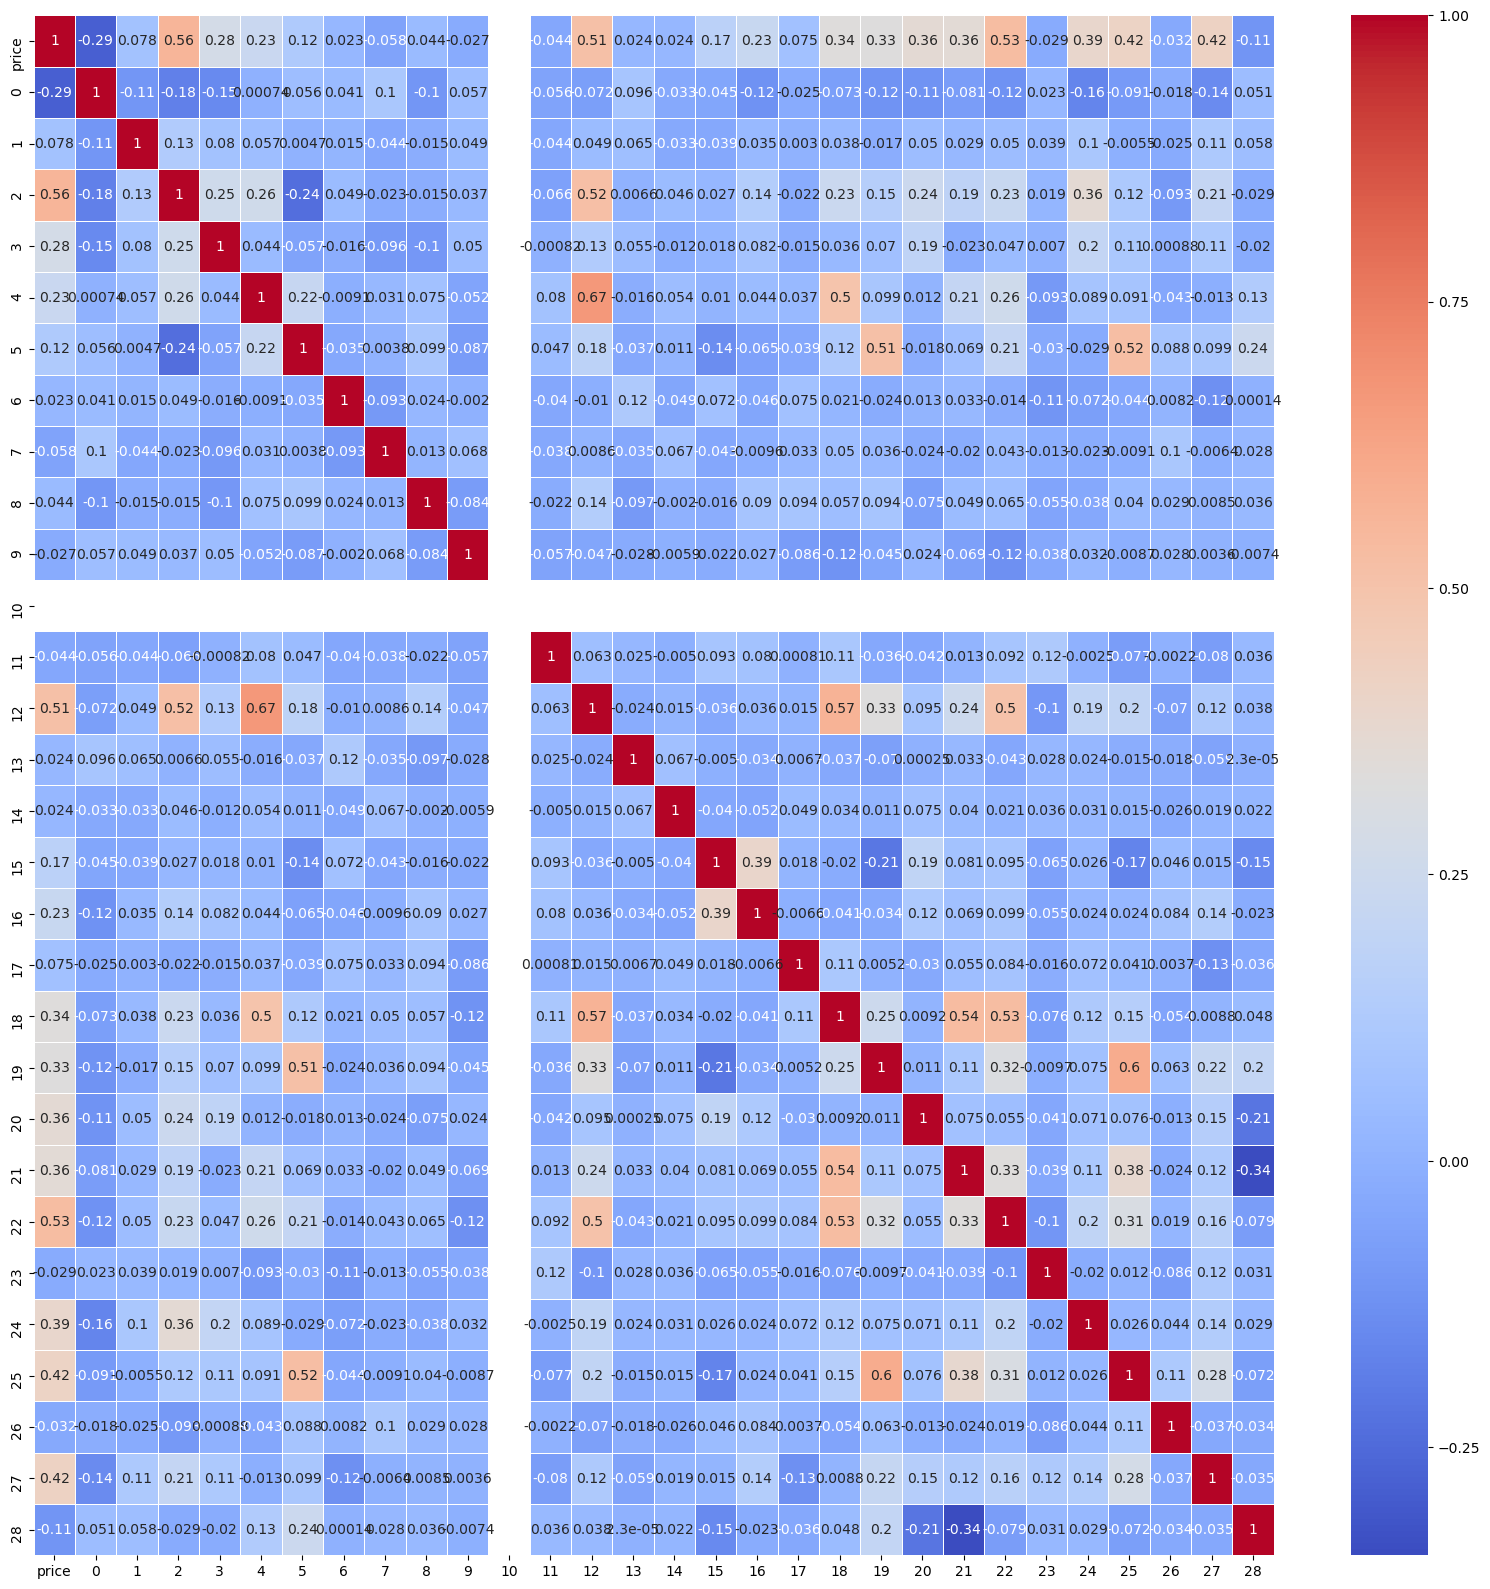

In [8]:
# Вычисление корреляционной матрицы
correlation_matrix = df_train.corr()

# Визуализация корреляционной матрицы
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

### Посмотрим корреляцию только для нашего таргета со всеми остальными фичами

0    -0.286478
1     0.077768
2     0.563425
3     0.277344
4     0.230032
5     0.123489
6     0.023240
7    -0.058357
8     0.044062
9    -0.026874
10         NaN
11   -0.043878
12    0.511799
13    0.024195
14    0.023643
15    0.171000
16    0.227890
17    0.075106
18    0.335347
19    0.329963
20    0.364022
21    0.359166
22    0.530927
23   -0.028897
24    0.386473
25    0.415463
26   -0.031564
27    0.418608
28   -0.112216
Name: price, dtype: float64


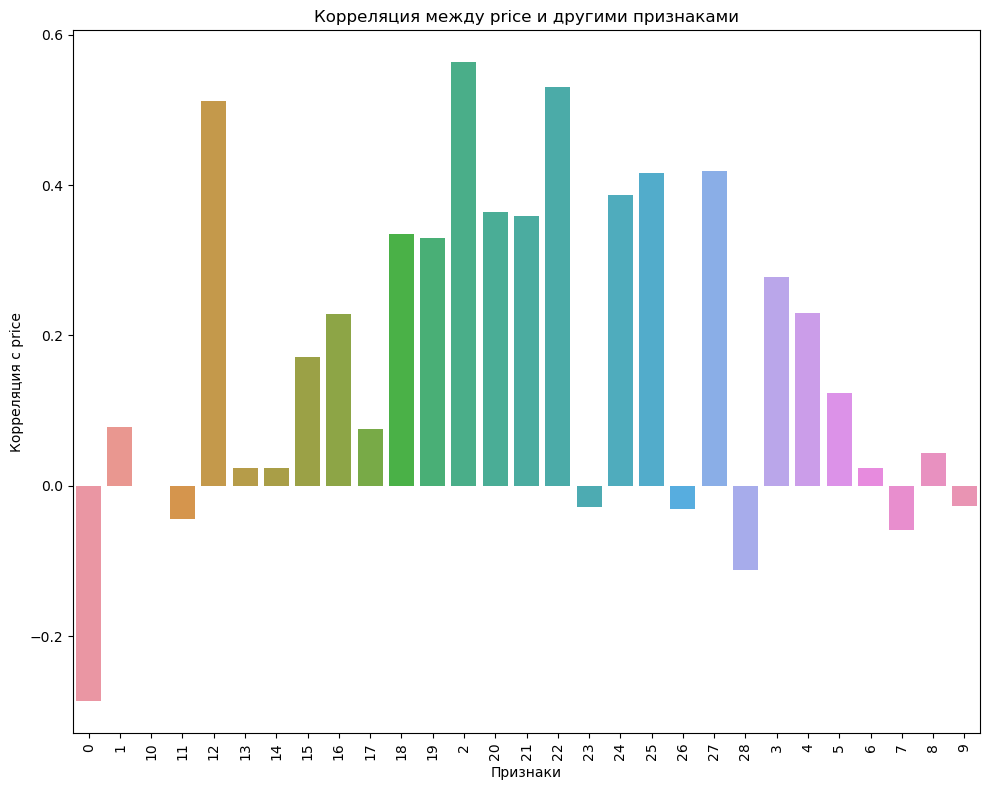

In [9]:
# Вычисление корреляции поля "price" со всеми остальными фичами
price_corr = df_train.corr()['price'].drop('price')

# Вывод корреляции в виде списка
print(price_corr)

# Визуализация корреляции
plt.figure(figsize=(10, 8))
sns.barplot(x=price_corr.index, y=price_corr.values)
plt.xticks(rotation='vertical')
plt.xlabel('Признаки')
plt.ylabel('Корреляция с price')
plt.title('Корреляция между price и другими признаками')
plt.tight_layout()
plt.show()

In [10]:
# Отбор фичей с корреляцией по модулю больше 0.1
selected_features = price_corr[abs(price_corr) > 0.1].index.tolist()

# Вывод списка отобранных фичей
print(selected_features)

['0', '2', '3', '4', '5', '12', '15', '16', '18', '19', '20', '21', '22', '24', '25', '27', '28']


## Отбор с помощью матрицы корреляции, если у нас будет использоваться линейная модель. 

## Для этого проверим, какая модель будет более устойчивая (через обычную кросс-валидацию)

In [11]:
y = df_train['price']
X = df_train.drop(columns=['price'])

In [12]:
X

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.222962,0.047686,-1.033389,-2.465344,0.831065,0.802990,1.590989,0.727946,0.893957,-1.503143,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.882735,-0.805741,-0.929397,0.232557,-0.679063,1.307431
1,-0.091662,-0.356325,-0.486840,-2.465344,-0.126718,-0.024866,-0.323972,1.658337,1.751428,-1.573310,...,-0.141322,-0.554035,0.047278,-0.570187,-0.897850,-0.805741,0.224410,0.864016,1.472618,-0.478408
2,1.222962,-1.064819,0.338749,0.405623,-0.854973,-0.654330,0.525426,0.585866,-1.661101,1.007304,...,-0.141322,-0.554035,-1.308863,-0.570187,-0.491114,0.355976,-0.929397,1.118967,1.472618,1.307431
3,1.222962,-1.570692,-0.696696,0.405623,-0.670784,-0.024866,0.557116,-1.280083,1.273040,-1.163932,...,-0.141322,-0.554035,1.403419,-0.570187,-0.724485,-0.805741,0.224410,0.924687,-0.679063,-0.478408
4,-1.406286,-1.563680,-1.058295,0.405623,-0.126718,-0.879174,-1.649281,0.496669,0.255596,0.928381,...,-0.141322,1.804941,0.047278,-0.570187,-0.306965,-0.805741,1.378217,0.170486,-0.679063,-0.478408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,-0.091662,0.593876,-0.087882,-2.465344,0.077307,0.151482,1.452151,1.772175,-1.264971,-1.352937,...,-0.141322,-0.554035,1.403419,-0.570187,0.454355,-0.805741,1.378217,1.200306,-0.679063,1.307431
404,-1.406286,0.179794,0.640850,0.405623,-0.126718,-0.975186,-1.028510,0.203867,-1.190658,0.955389,...,-0.141322,1.804941,0.047278,-0.570187,-1.037904,1.517692,-0.929397,0.960546,-0.679063,-0.478408
405,-0.091662,1.099966,0.225750,-2.465344,-0.716123,-0.534316,-0.090348,1.151380,1.631097,0.673274,...,-0.141322,-0.554035,-1.308863,-0.570187,0.477182,-0.805741,-0.929397,-1.512245,-0.679063,1.307431
406,1.222962,1.498909,-0.392289,0.405623,-0.126718,-0.024866,1.484438,-1.233671,-0.469048,-1.250468,...,-0.141322,-0.554035,0.047278,1.421812,0.407275,0.355976,0.224410,-1.477806,-0.679063,-0.478408


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True)

In [14]:
clf_list = [KNeighborsRegressor(),  RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), DecisionTreeRegressor()
                           , LinearRegression(),  Lasso(), Ridge(), ElasticNet(), SVR()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train, y_train, cv=7, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([nan, nan, nan, nan, nan, nan, nan]),
 array([-0.21315802, -0.20851163, -0.19164344, -0.28515058, -0.14979152,
        -0.25811625, -0.16987345]),
 array([-0.2240095 , -0.19204164, -0.17088322, -0.28789128, -0.14420022,
        -0.2374692 , -0.15308606]),
 array([-0.21144523, -0.21363565, -0.17562404, -0.26733809, -0.13206094,
        -0.25603514, -0.16056965]),
 array([-0.28504124, -0.33945527, -0.29107389, -0.35387614, -0.22456625,
        -0.30042658, -0.19808125]),
 array([-0.22508874, -0.18119516, -0.17544629, -0.25040008, -0.14491813,
        -0.22514358, -0.16942116]),
 array([-0.22508817, -0.18119487, -0.17544631, -0.25039985, -0.14491732,
        -0.22514314, -0.16942088]),
 array([-0.2246973 , -0.18093614, -0.17536914, -0.25020449, -0.14453871,
        -0.22463211, -0.16940389]),
 array([-0.20828692, -0.17209722, -0.1855586 , -0.25203166, -0.13111437,
        -0.21801733, -0.18200861]),
 array([-0.29719249, -0.28387405, -0.33252252, -0.39292463, -0.2440182 ,
        -0

In [15]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor(),LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR()
0,NaN,-0.213158,-0.224009,-0.211445,-0.285041,-0.225089,-0.225088,-0.224697,-0.208287,-0.297192
1,NaN,-0.208512,-0.192042,-0.213636,-0.339455,-0.181195,-0.181195,-0.180936,-0.172097,-0.283874
2,NaN,-0.191643,-0.170883,-0.175624,-0.291074,-0.175446,-0.175446,-0.175369,-0.185559,-0.332523
3,NaN,-0.285151,-0.287891,-0.267338,-0.353876,-0.250400,-0.250400,-0.250204,-0.252032,-0.392925
4,NaN,-0.149792,-0.144200,-0.132061,-0.224566,-0.144918,-0.144917,-0.144539,-0.131114,-0.244018
5,NaN,-0.258116,-0.237469,-0.256035,-0.300427,-0.225144,-0.225143,-0.224632,-0.218017,-0.303060
6,NaN,-0.169873,-0.153086,-0.160570,-0.198081,-0.169421,-0.169421,-0.169404,-0.182009,-0.309185


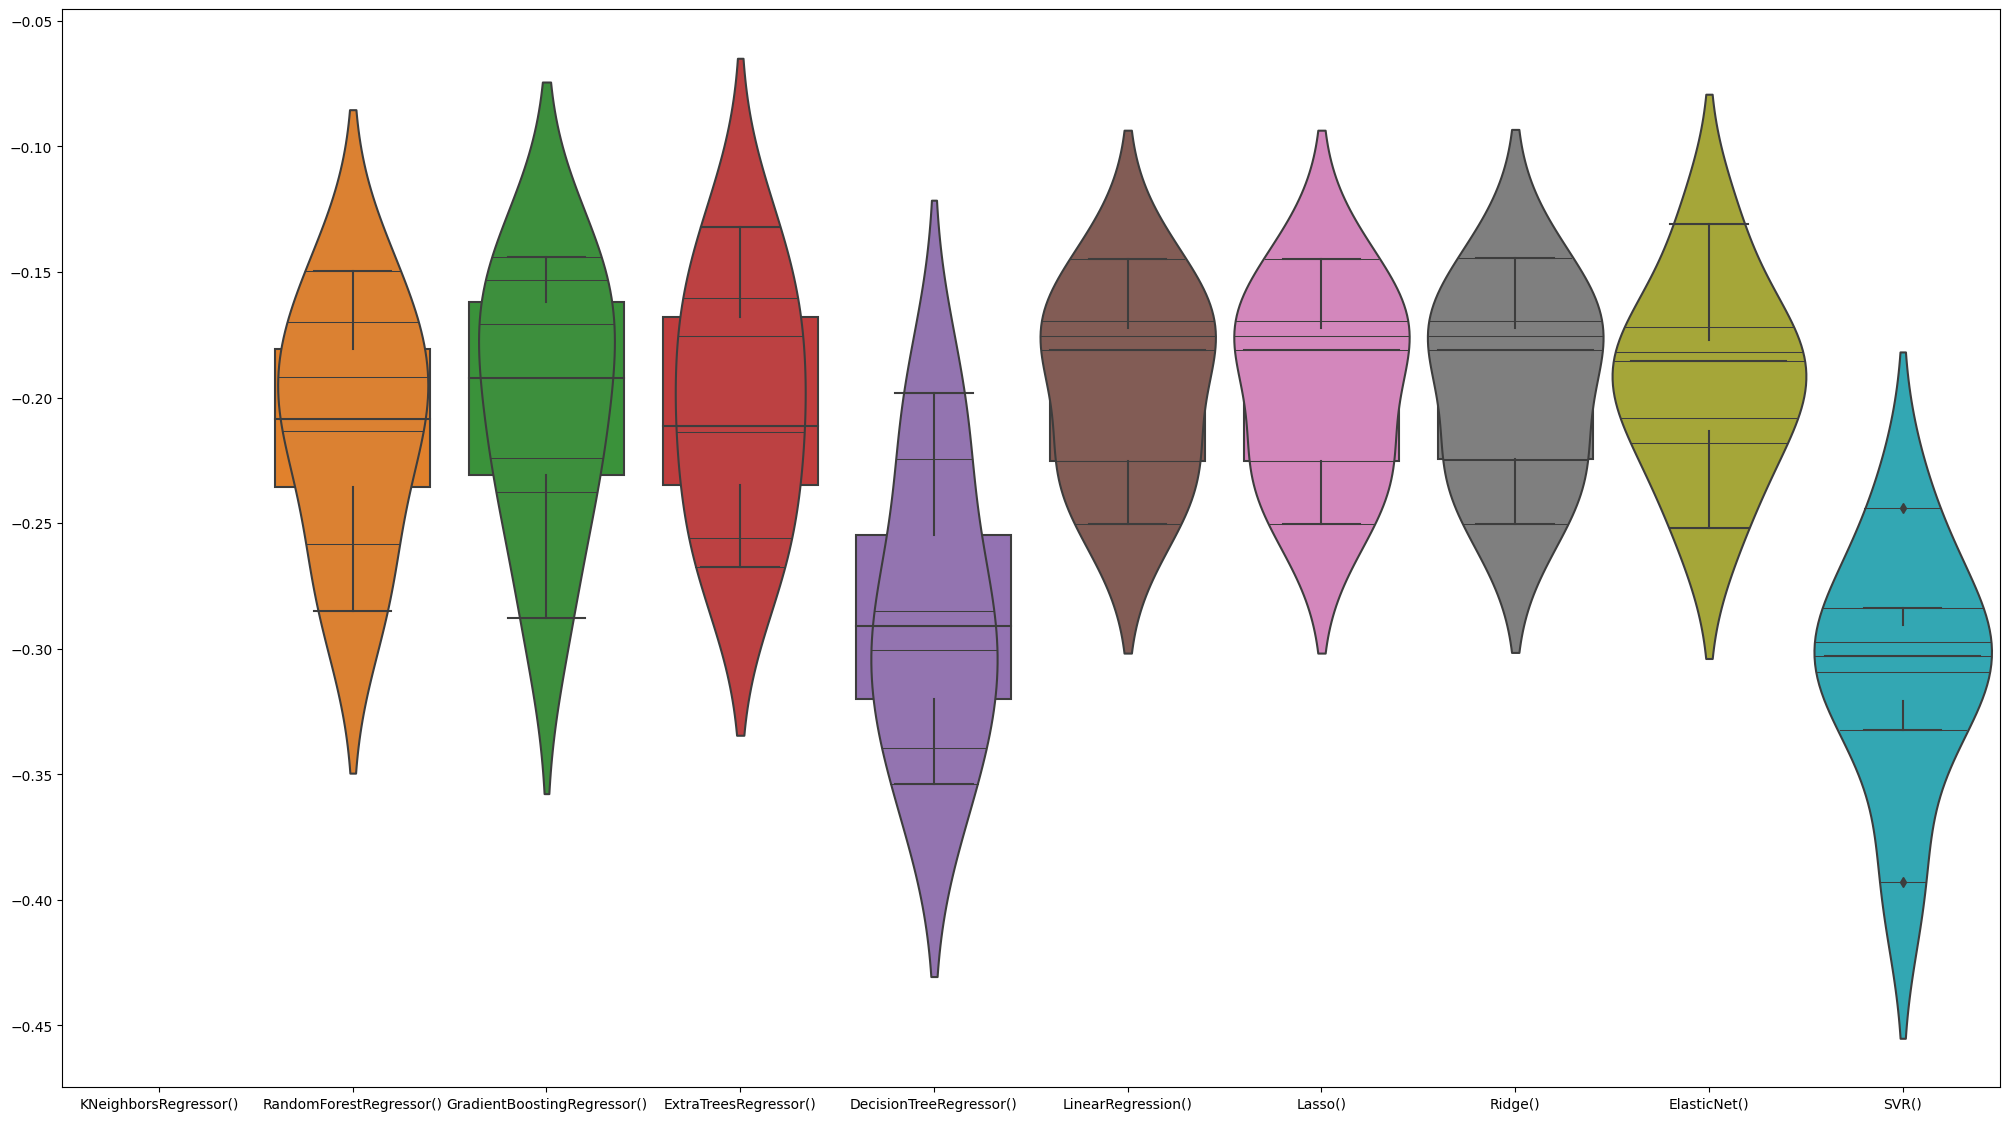

In [16]:
# Делаем самолетики без фичинга
plt.figure(figsize=(25, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

### Видим, что разброс у линейных моделей по типу LinearRegression, Lasso, Ridge меньше всего.

### ElasticNet при одном из разбиении фолдов показала один из лучших результатов качества метрики MAPE 0.10. Но это не значит, что в целом она будет хорошо работать.

### Наши любимые RF и GradientBoostingRegressor показали тоже неплохие результаты, но они все равно чуть ниже линейных моделей

### Поэтому было принято решение воспользоваться обычной линейной регрессией (при этом если останется время, посмотрю метрики на предсказаниях остальных моделей)

In [17]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train, y_train)
y_pred_1 = pipe_1.predict(X_val)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 881404772084.6346
Test: 1426166832602.5352
Train: 0.16530076424340753
Test: 0.17300339662926098


In [18]:
pipe_2 = RandomForestRegressor()
pipe_2.fit(X_train, y_train)
y_pred_1 = pipe_2.predict(X_val)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 881404772084.6346
Test: 1560263502531.8628
Train: 0.16530076424340753
Test: 0.18325341795622624


### Даже здесь видим, несмотря на то, что RF хорошо обучился на трейне, на тесте он показал другой результат.

### В данном случае, очевидно, что лучше взять, ту модель, у которой разница метрик между трейн и тест минимальна, и при этом метрика на тесте примерно на том же уровне, как у других моделей

## Посмотрим, какие коэффициенты выдает наша модель

In [19]:
pipe_1.coef_

array([-1.97231724e+05, -6.33848710e+04,  4.80515554e+05,  1.29786750e+05,
       -7.04701337e+04,  1.78166387e+05,  7.15161552e+04, -1.27338430e+04,
       -4.08317649e+04, -1.89198585e+04, -4.07453626e-10, -1.10707730e+05,
        2.97666340e+05,  1.09204356e+05, -3.19394517e+04,  2.15827893e+05,
        1.54836845e+05,  1.68138738e+05, -3.76466626e+04, -9.63710782e+04,
        2.94040278e+05,  1.28415138e+05,  4.09953934e+05,  6.58451514e+04,
        2.57803258e+05,  4.09188490e+05, -4.56095938e+04,  3.40250691e+05,
        8.81995924e+04])

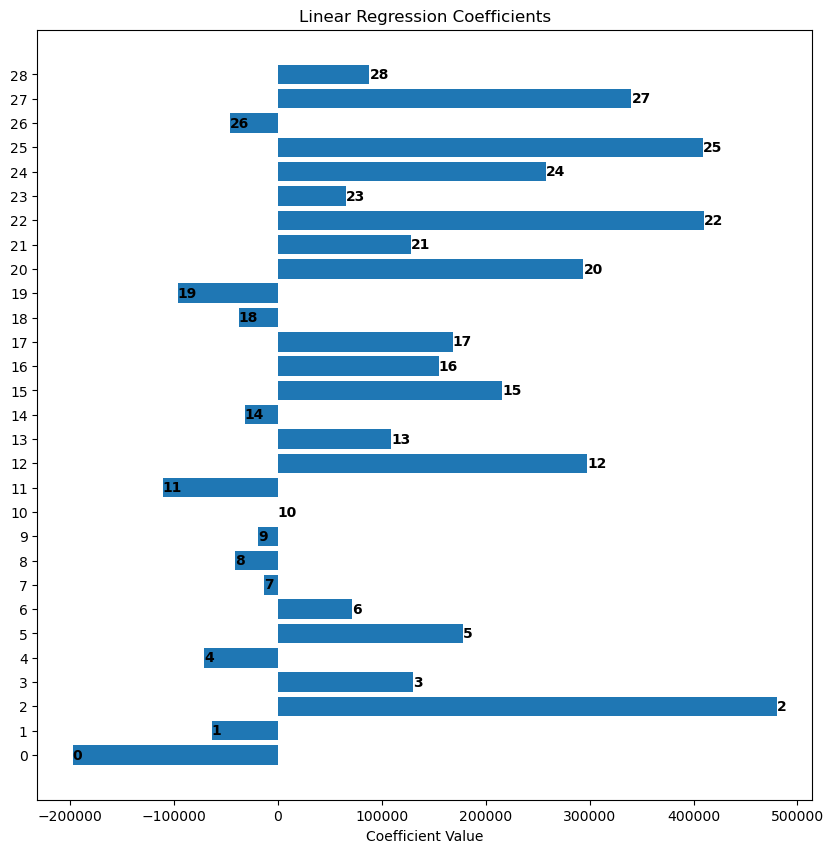

In [20]:
coefficients = pipe_1.coef_

plt.figure(figsize=(10, 10))
plt.barh(range(len(coefficients)), coefficients, align='center')

plt.yticks(range(len(coefficients)), range(len(coefficients))) 


for i, v in enumerate(coefficients):
    plt.text(v, i, X.columns[i], color='black', fontweight='bold', ha='left', va='center')

plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

## Проверка выбранной модели и отбор фич


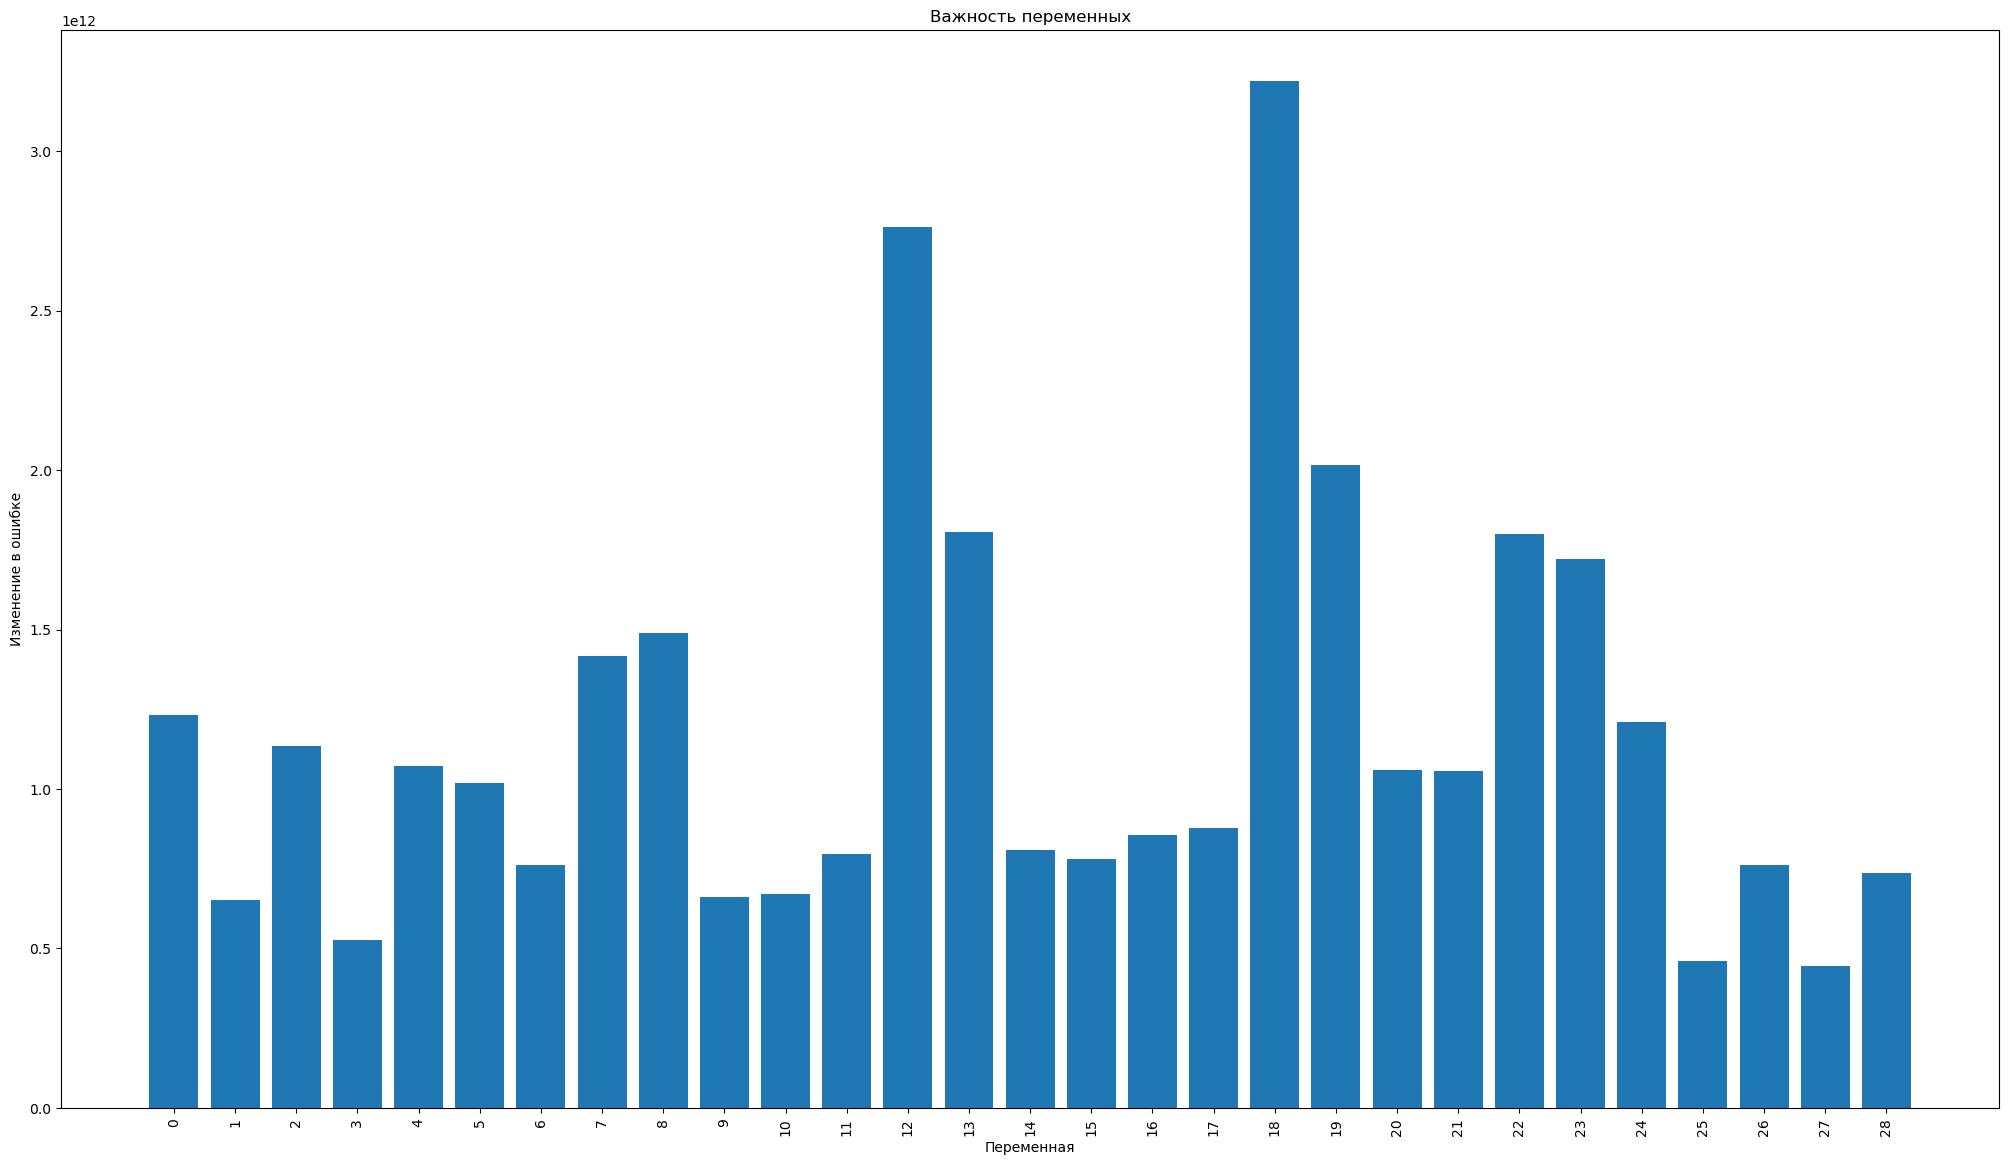

In [21]:


feature_names = X.columns


model = LinearRegression()
model.fit(X, y)

cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=len(feature_names))


plt.figure(figsize=(25, 14))
plt.bar(feature_names, cv_scores)
plt.xlabel('Переменная')
plt.ylabel('Изменение в ошибке')
plt.title('Важность переменных')
plt.xticks(rotation=90)
plt.show()

### Более высокие значения разброса ошибки указывают на переменные, которые могут потенциально ухудшить качество модели.


### Еще один из способов проверить важность переменных, это применить мат. статистику. И определить F-статистику для каждой переменной, чем она больше, тем лучше.

### но для начала нужно убедиться, что наше p_value меньше 0.05

In [27]:
f_scores, p_values = f_regression(X, y)

In [28]:
# p_values

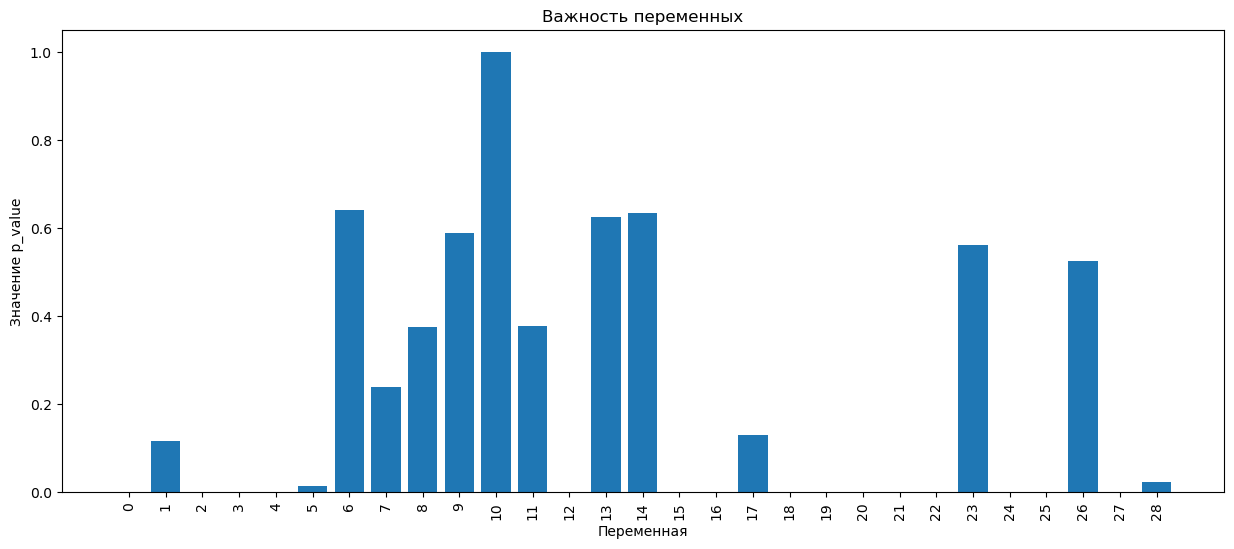

In [29]:
p_values
plt.figure(figsize=(15, 6))


plt.bar(feature_names, p_values)
plt.xlabel('Переменная')
plt.ylabel('Значение p_value')  
plt.title('Важность переменных')
plt.xticks(rotation=90)
plt.show()

## Нас интересуют фичи с p_value меньше 0.05

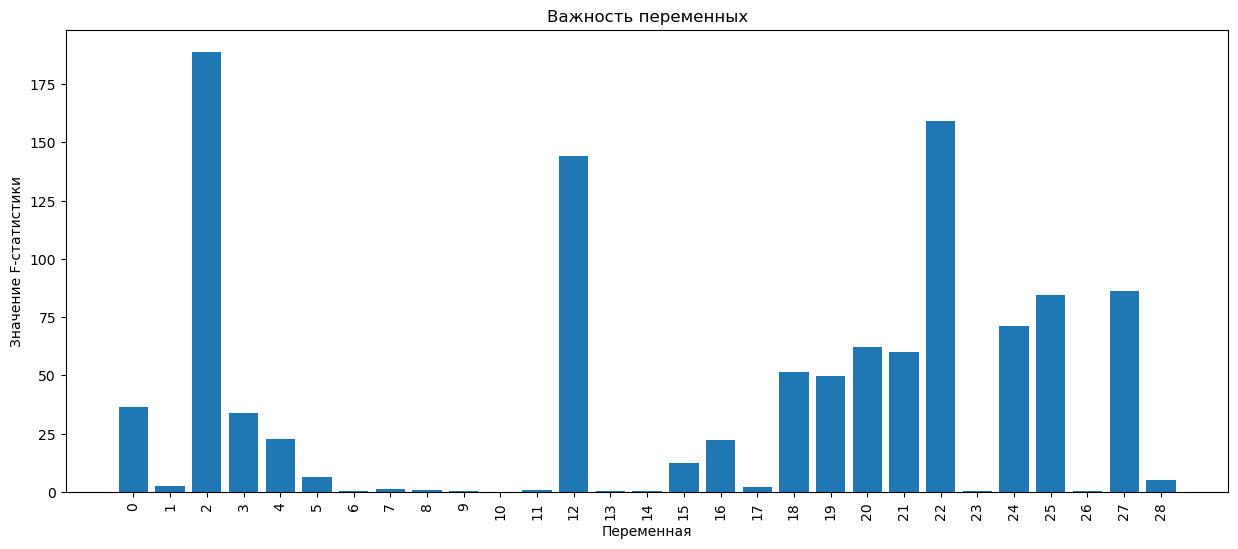

In [30]:

plt.figure(figsize=(15, 6))
plt.bar(feature_names, f_scores)


plt.xlabel('Переменная')
plt.ylabel('Значение F-статистики')  
plt.title('Важность переменных')
plt.xticks(rotation=90)
plt.show()

Смотрим на колонки с p_value < 0.05

Колонки с большим значением F-статистики: эти переменные могут значительно улучшить точность модели, если они включены в модель

Колонки с малым значением F-статистики: эти переменные могут ухудшить точность модели, если они остаются включенными в модель

## Более простой и надежный способ по отбору фич с помощью FeatureSelection от sklearn. 

Им мы впоследствии и воспользуемся

### Попробуем отобрать 10, 15 и 20 фич

Сравним метрики на  кросс-валидации, а потом на предсказаниях. И выберем 1 из моделей

In [45]:
rfe_select = RFE(LinearRegression(), step = 1, 
                 n_features_to_select=10)
rfe_select.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

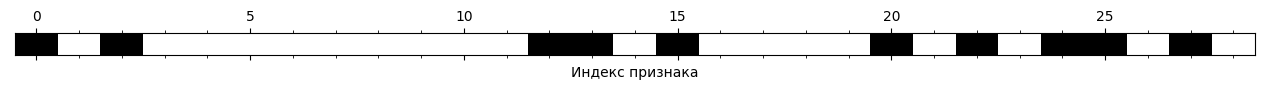

In [46]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

In [47]:
X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [48]:
features_names_imp


Index(['0', '2', '12', '13', '15', '20', '22', '24', '25', '27'], dtype='object')

In [49]:
clf_list = [LinearRegression(),  Lasso(), Ridge(), ElasticNet()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train_imp, y_train, cv=7, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

[array([-0.18425872, -0.16351653, -0.18276702, -0.24536639, -0.13788632,
        -0.2123316 , -0.14685389]),
 array([-0.18425865, -0.16351651, -0.18276702, -0.24536627, -0.13788612,
        -0.21233166, -0.14685404]),
 array([-0.18414484, -0.16343144, -0.18277651, -0.2452249 , -0.1376607 ,
        -0.21230384, -0.14689766]),
 array([-0.19321072, -0.16949344, -0.19267539, -0.25092823, -0.13192646,
        -0.22036382, -0.1597404 ])]

In [50]:
cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

,LinearRegression(),Lasso(),Ridge(),ElasticNet()
0,-0.184259,-0.184259,-0.184145,-0.193211
1,-0.163517,-0.163517,-0.163431,-0.169493
2,-0.182767,-0.182767,-0.182777,-0.192675
3,-0.245366,-0.245366,-0.245225,-0.250928
4,-0.137886,-0.137886,-0.137661,-0.131926
5,-0.212332,-0.212332,-0.212304,-0.220364
6,-0.146854,-0.146854,-0.146898,-0.159740


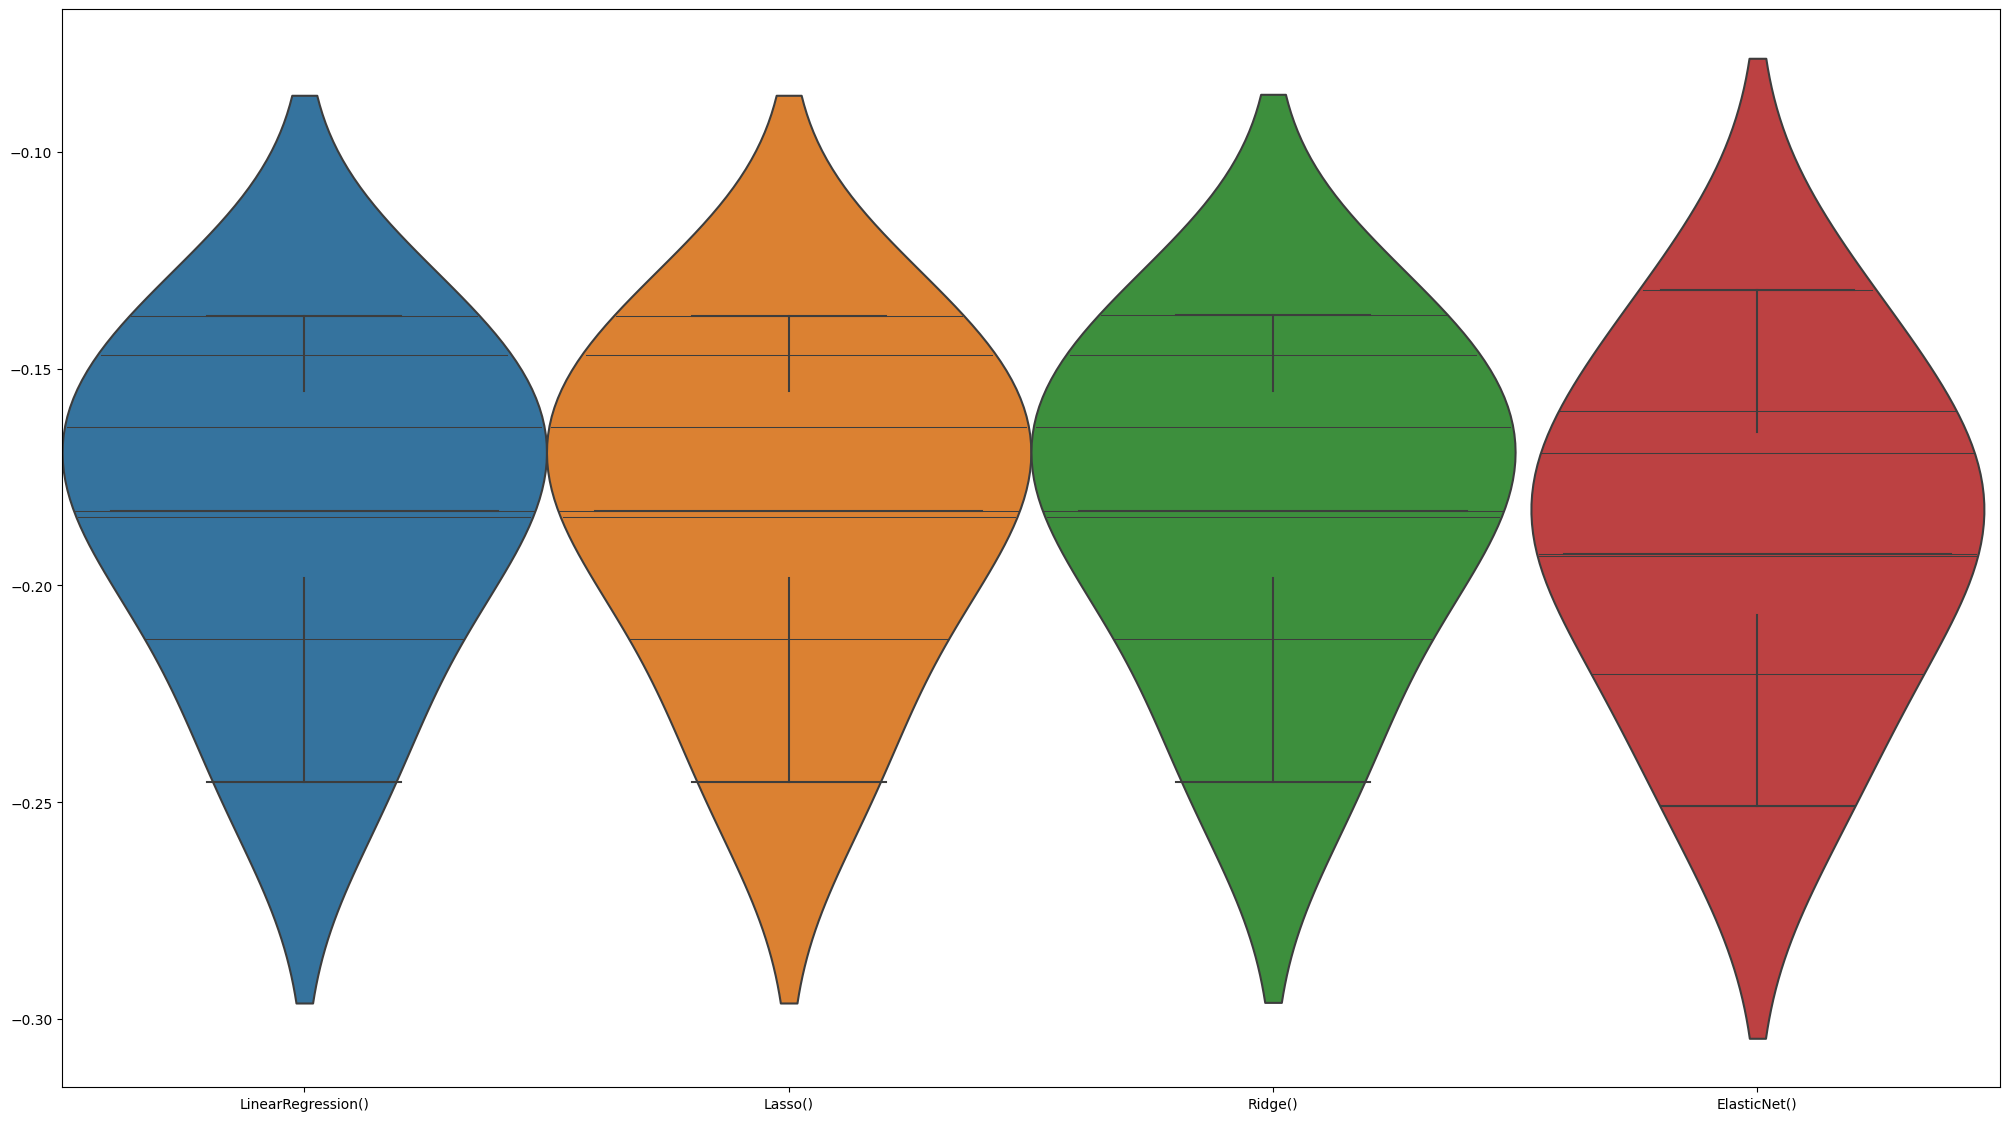

In [51]:
# Делаем самолетики без фичинга
plt.figure(figsize=(25, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [52]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train_imp, y_train)
y_pred_1 = pipe_1.predict(X_val_imp)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 1065974074021.4447
Test: 1146397184527.8435
Train: 0.17397224437582545
Test: 0.16671777405212262


In [31]:
rfe_select = RFE(LinearRegression(), step = 1, 
                 n_features_to_select=20)
rfe_select.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

Text(0.5, 0, 'Индекс признака')

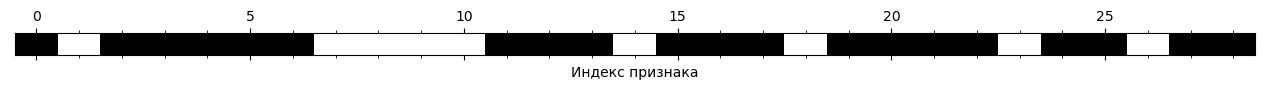

In [32]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака")


In [33]:
X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]

In [34]:
features_names_imp

Index(['0', '2', '3', '4', '5', '6', '11', '12', '13', '15', '16', '17', '19',
       '20', '21', '22', '24', '25', '27', '28'],
      dtype='object')

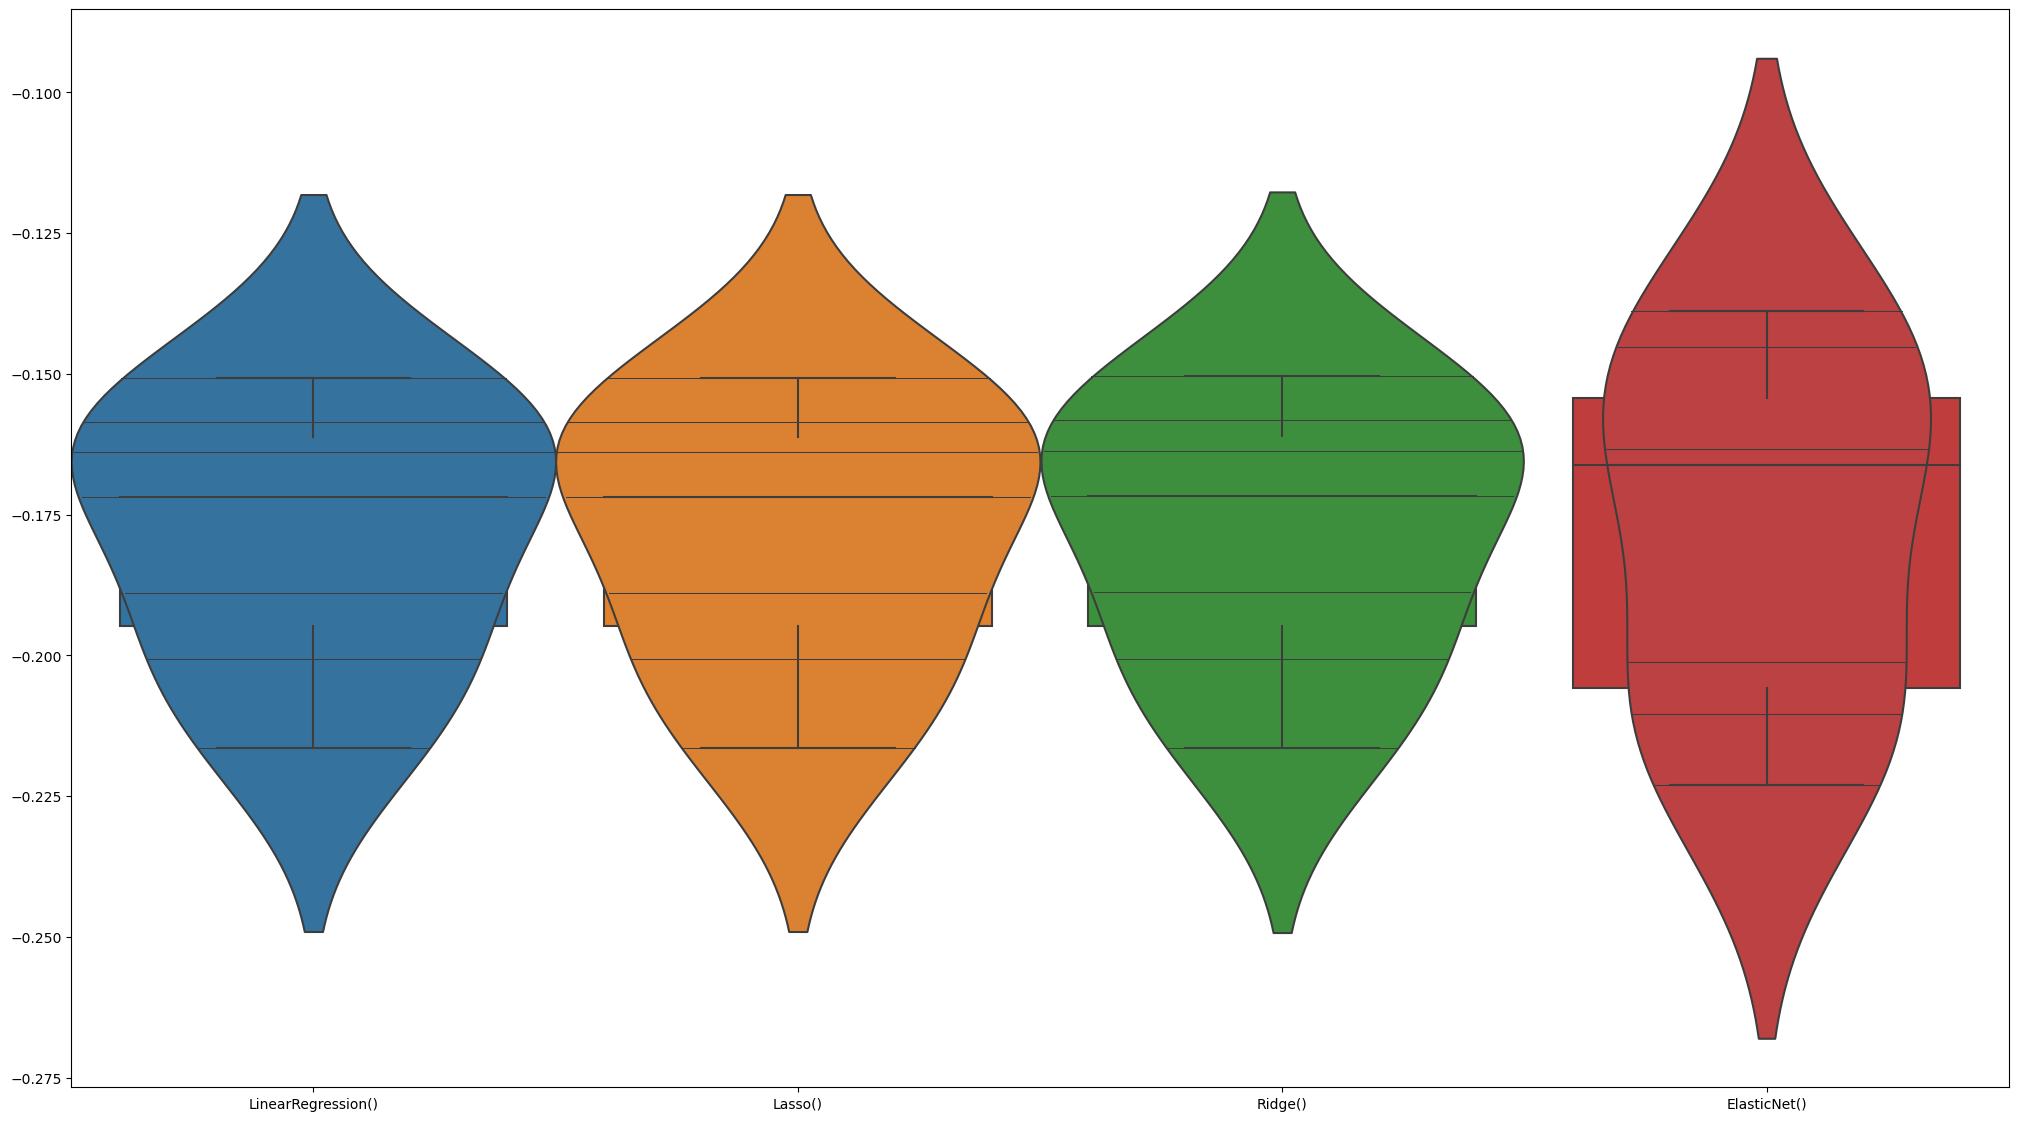

In [35]:
clf_list = [LinearRegression(),  Lasso(), Ridge(), ElasticNet()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train_imp, y_train, cv=7, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

# Делаем самолетики без фичинга
plt.figure(figsize=(25, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [36]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train_imp, y_train)
y_pred_1 = pipe_1.predict(X_val_imp)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 893940774416.9557
Test: 1416138884999.483
Train: 0.16554467750776336
Test: 0.17139578359979568


In [52]:
rfe_select = RFE(LinearRegression(), step = 1, 
                 n_features_to_select=15)
rfe_select.fit(X_train, y_train)



RFE(estimator=LinearRegression(), n_features_to_select=15)

Text(0.5, 0, 'Индекс признака')

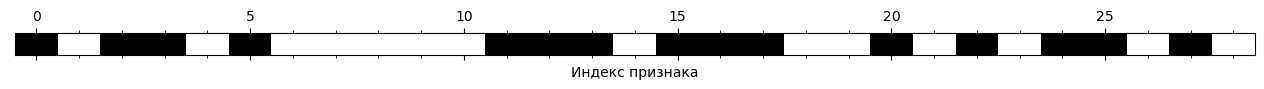

In [53]:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака")


In [54]:

X_train_imp = X_train[X_train.columns[mask]]
X_val_imp = X_val[X_train.columns[mask]]
features_names_imp = X_train.columns[mask]


In [55]:
features_names_imp


Index(['0', '2', '3', '5', '11', '12', '13', '15', '16', '17', '20', '22',
       '24', '25', '27'],
      dtype='object')

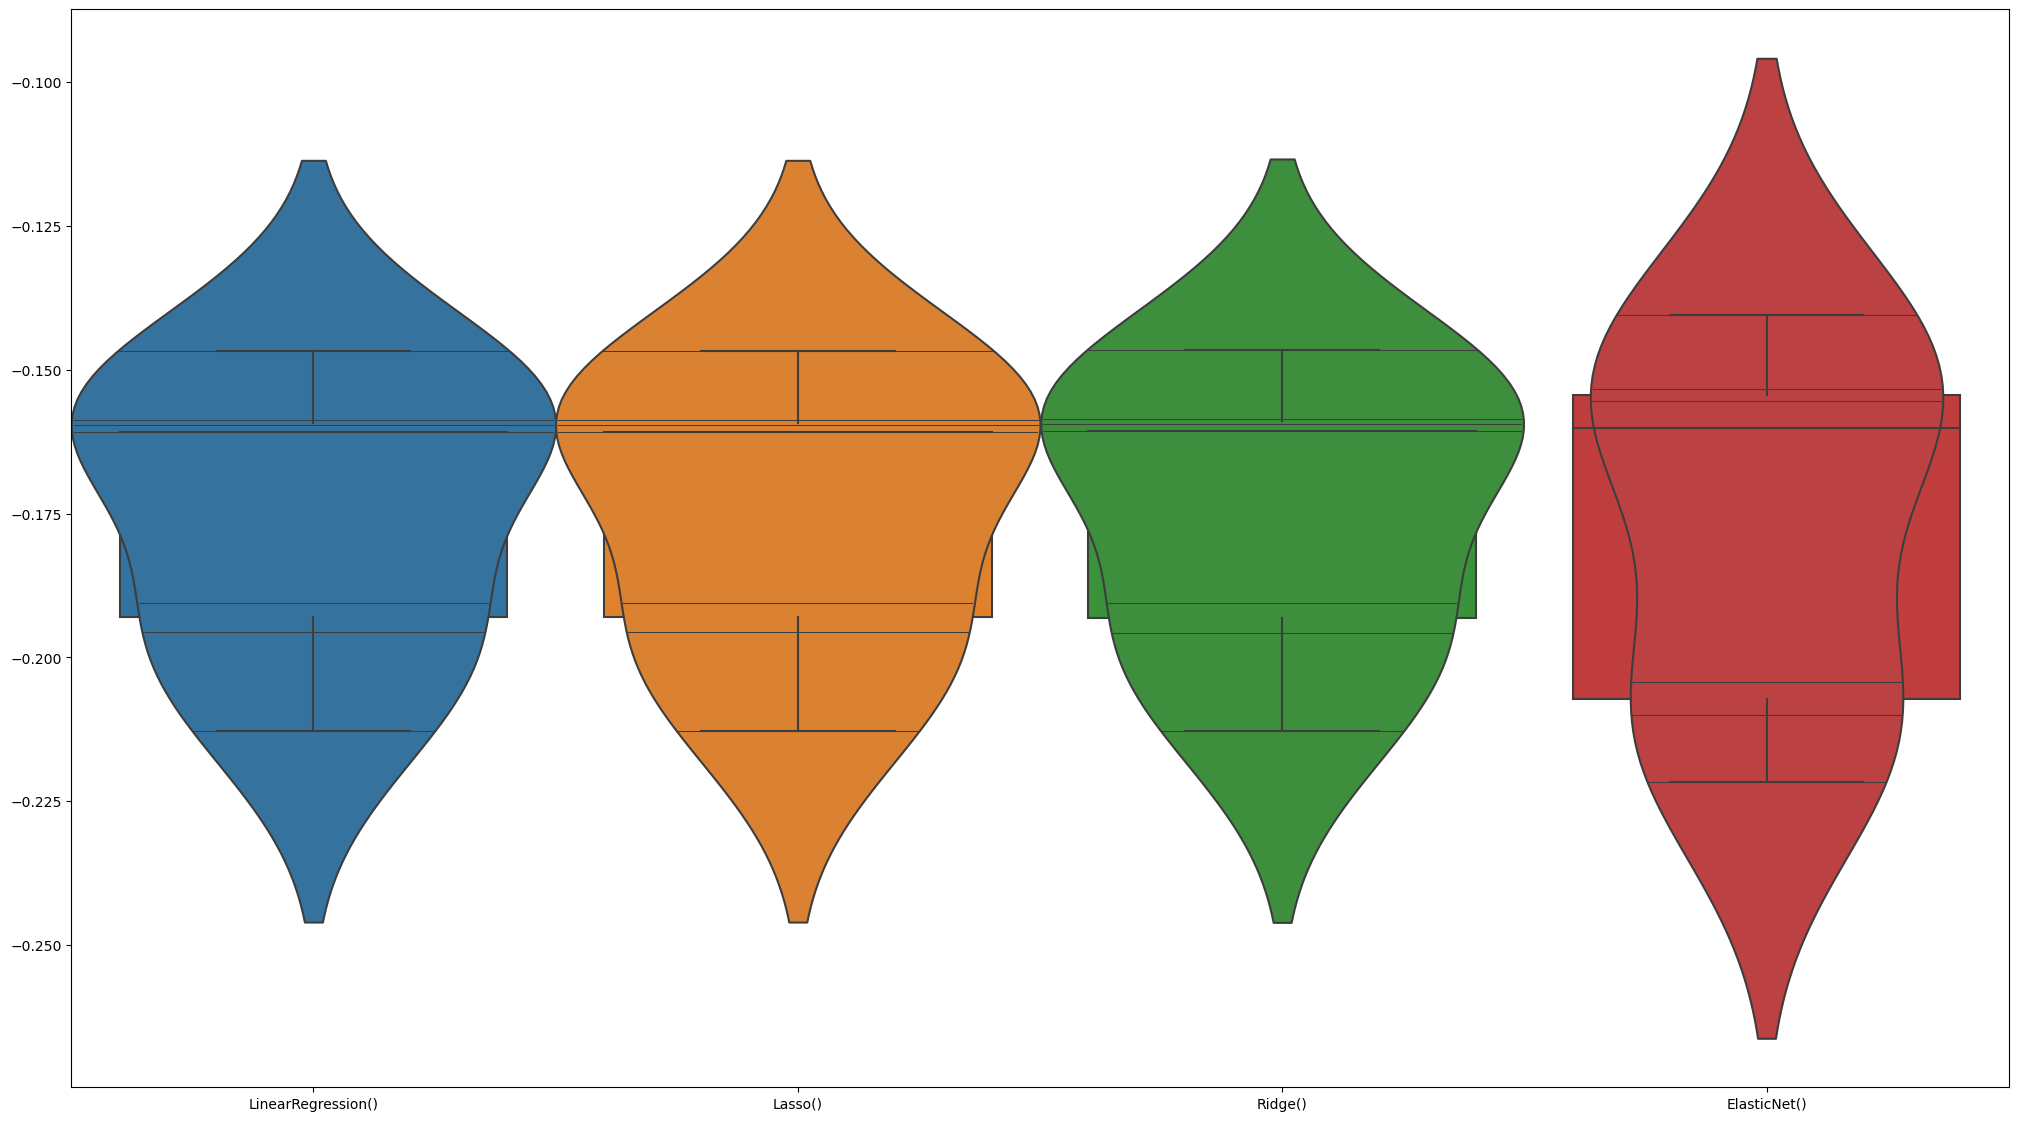

In [56]:
clf_list = [LinearRegression(),  Lasso(), Ridge(), ElasticNet()]
cv_list = []
for clf in clf_list:
    pipe = Pipeline([('classifier', clf)])
    #pipe.fit(X_train, y_train)
    cv_results = cross_validate(pipe, X_train_imp, y_train, cv=7, scoring = 'neg_mean_absolute_percentage_error', n_jobs = -1)
    cv_list.append(cv_results['test_score'])
cv_list

cv_df = pd.DataFrame(np.array(cv_list).T)
cv_df.columns = [str(i) for i in clf_list]
cv_df

# Делаем самолетики без фичинга
plt.figure(figsize=(25, 14))
sns.boxplot(data=cv_df)
sns.violinplot(data=cv_df, inner="stick",saturation=0.7, width = 1)
plt.show();

In [57]:
pipe_1 = LinearRegression()
pipe_1.fit(X_train_imp, y_train)
y_pred_1 = pipe_1.predict(X_val_imp)

print("Train:",mean_squared_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_squared_error(y_val, y_pred_1))

print("Train:",mean_absolute_percentage_error(y_train, pipe_1.predict(X_train_imp)))
print("Test:",mean_absolute_percentage_error(y_val, y_pred_1))

Train: 910695230860.5282
Test: 1423326821959.892
Train: 0.1651435004963549
Test: 0.1720060120813739


## Выберем модель с 15-ти фичами

# Блок предсказания с использованием тестового набора


In [46]:
lr = LinearRegression()
lr.fit(X[list(features_names_imp)], y)


LinearRegression()

In [47]:

mask = list(features_names_imp)
X_test = X_test[mask]

In [48]:
mask

['0',
 '2',
 '3',
 '5',
 '11',
 '12',
 '13',
 '15',
 '16',
 '17',
 '20',
 '22',
 '24',
 '25',
 '27']

In [49]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = lr.predict(X_test)

In [50]:
y_predict[:20]

array([5207713.34328858, 4188515.50935821, 7890649.33591553,
       7436670.82152779, 6890895.53578514, 4044107.33646036,
       3850905.46309964, 4255692.49531724, 3125869.59595895,
       4348957.54221651, 4901008.48376906, 4333126.18285774,
       3711972.28812748, 5547941.65763742, 6035534.04978076,
       6593359.46316051, 3201356.77867231, 2797633.9672372 ,
       7265230.20106761, 4206102.87882494])

In [51]:
len(y_predict)

137